Loading **the** Dataset provided

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
import pandas as pd
df=pd.DataFrame(pd.read_csv('advertising.csv'))

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()
#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()
#statistical Summary

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.shape

(200, 4)

In [ ]:
#checking for null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Splitting** the data into training and testing sets.

**Training** the Linear Regression model.

**Evaluating** the model using metrics like R-squared and Mean Squared Error.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
# Features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

Here are the values of the MSE and R-squared


In [ ]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 2.40
R-squared: 0.91
Mean Absolute Error: 1.12


The MSE of 2.40 suggests that, on average, the squared differences between the actual and predicted sales values are lower compared to the previous model (MSE of 5.51). This indicates that the model's predictions are closer to the actual sales values.

An *R² of 0.91* is quite high, suggesting that the model fits the data well.

MAE of 1.12 Indicates that the average absolute difference between the predicted and actual sales values is 1.12. This means that, on average, the predictions are quite close to the true values, which is a good indication of the model's accuracy.

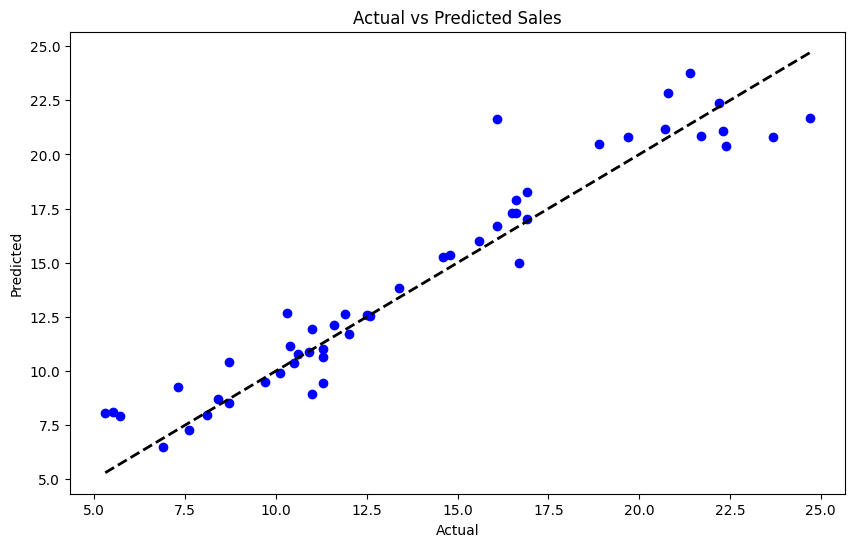

In [ ]:
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()